### Library

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
df =  pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')

In [11]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [12]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assening Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [14]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

In [17]:
df.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [18]:
df.loc[:, df.isnull().any()].columns #Feature yg terdiri data hilang

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [19]:
# label encoder untuk data kategorik menjadi data numerik

from sklearn.preprocessing import LabelEncoder

for col in ['wd', 'station']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df['wd'].unique(), df['station'].unique())

[ 0  1  5  3  6  7  4 12 11 15  2  9  8 14 10 13 16] [0]


In [20]:
#Data hilang: PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM

median_value=df['PM2.5'].median()
df['PM2.5']=df['PM2.5'].fillna(median_value)

median_value=df['PM10'].median()
df['PM10']=df['PM10'].fillna(median_value)

median_value=df['SO2'].median()
df['SO2']=df['SO2'].fillna(median_value)

median_value=df['NO2'].median()
df['NO2']=df['NO2'].fillna(median_value)

median_value=df['CO'].median()
df['CO']=df['CO'].fillna(median_value)

median_value=df['O3'].median()
df['O3']=df['O3'].fillna(median_value)

median_value=df['TEMP'].median()
df['TEMP']=df['TEMP'].fillna(median_value)

median_value=df['PRES'].median()
df['PRES']=df['PRES'].fillna(median_value)

median_value=df['DEWP'].median()
df['DEWP']=df['DEWP'].fillna(median_value)

median_value=df['RAIN'].median()
df['RAIN']=df['RAIN'].fillna(median_value)

median_value=df['wd'].median()
df['wd']=df['wd'].fillna(median_value)

median_value=df['WSPM'].median()
df['WSPM']=df['WSPM'].fillna(median_value)


In [21]:
#kita cek kembali apakah masih ada data yang hilang
df.isnull().values.any()

False

### Exploratory Data Analysisi (EDA)

In [22]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.545694,94.28179,14.816361,44.026443,1137.019279,57.734328,13.687644,1007.759764,1.505941,0.060278,6.648585,1.853402,0.0
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.619188,82.79695,20.813426,29.259029,1081.250627,53.869215,11.356788,10.218379,13.811653,0.752355,4.250525,1.309064,0.0
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.00000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000,0.000000,0.0
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.00000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,3.000000,1.000000,0.0
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.00000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,6.000000,1.500000,0.0
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.00000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,10.000000,2.300000,0.0
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.00000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,16.000000,10.000000,0.0


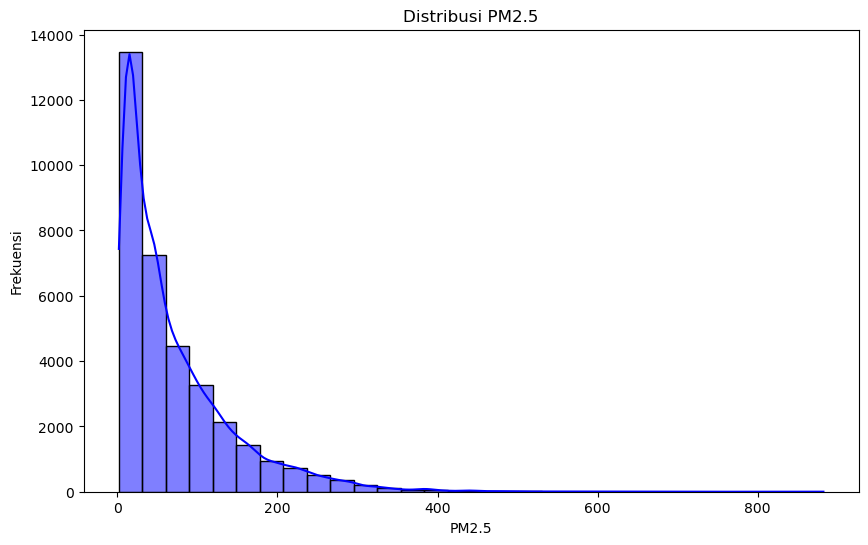

In [23]:
# Visualisasi distribusi PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'], kde=True, bins=30, color='blue')
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

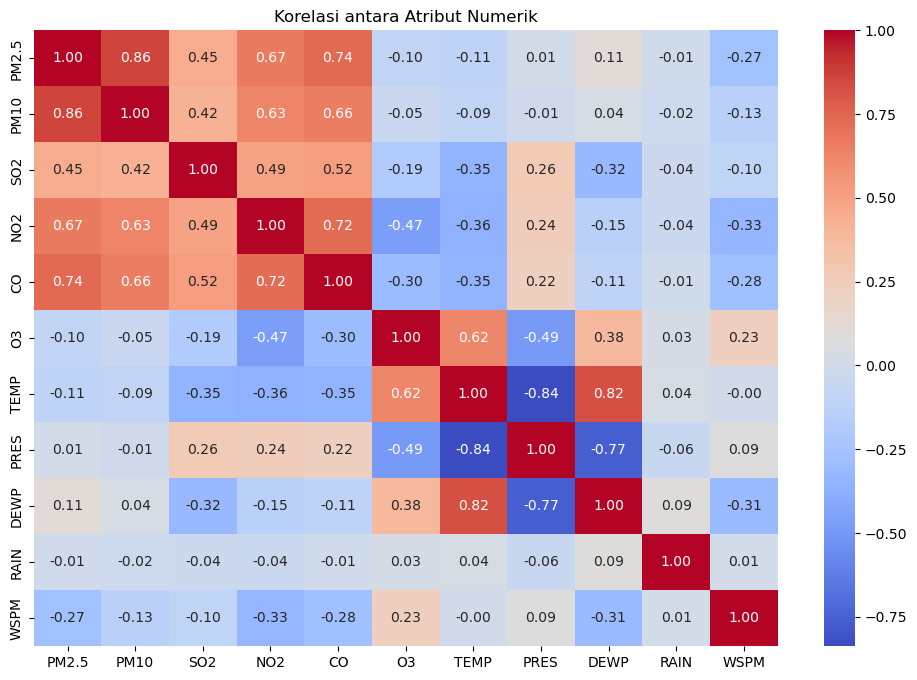

In [25]:
# Visualisasi korelasi antara beberapa atribut numerik
numerical_attributes = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
correlation_matrix = df[numerical_attributes].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Atribut Numerik')
plt.show()

### VIsualization & Explanatory Analysis

#### Question 1

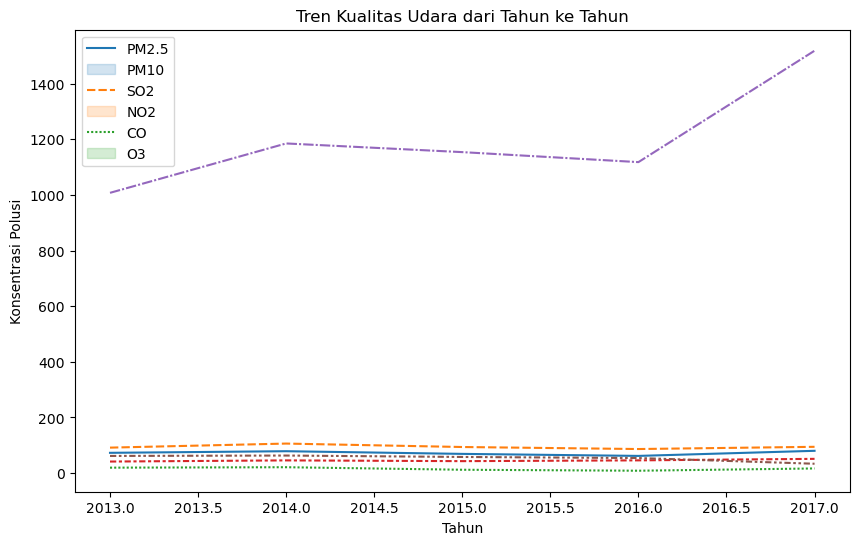

In [26]:
# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata polusi udara
yearly_mean = df.groupby('year').mean()

# Visualisasi tren rata-rata kualitas udara dari tahun ke tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_mean[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.title('Tren Kualitas Udara dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Polusi')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])
plt.show()

#### Question 2

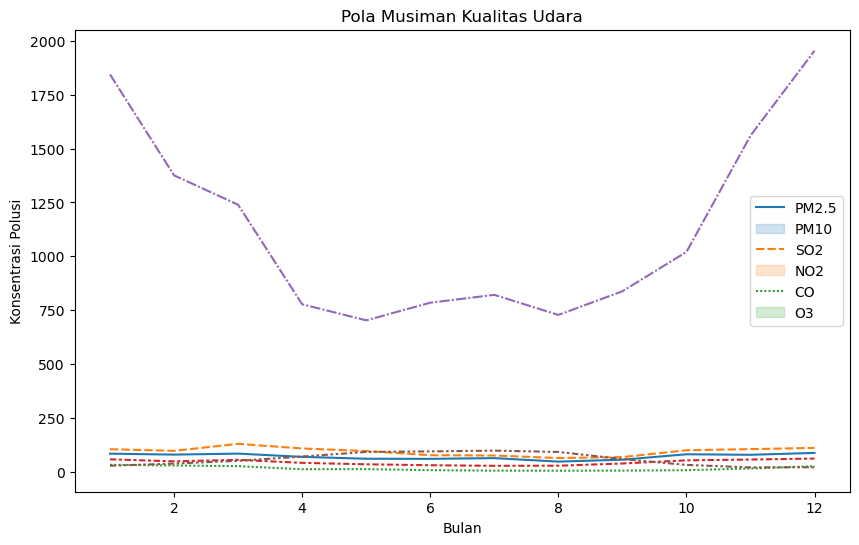

In [27]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata polusi udara
monthly_mean = df.groupby('month').mean()

# Visualisasi pola musiman kualitas udara
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_mean[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.title('Pola Musiman Kualitas Udara')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polusi')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])
plt.show()

### Conclusion

### Streamlit


In [29]:
df.to_csv("all_data.csv", index = False)

In [30]:
pip install streamlit babel

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/c5/ea/b50f166fb6e5c244568f798ade98fa261b82588ab9ad83230b327a82b42f/streamlit-1.31.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/ad/6e/1bed3b7c904cc178cb8ee8dbaf72934964452b3de95b7a63412591edb